In [1]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import KFold

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(['Pregnancies','Pedigree','SkinThickness'],axis=1,inplace=True)

In [9]:
df.columns

Index(['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age', 'Outcome'], dtype='object')

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

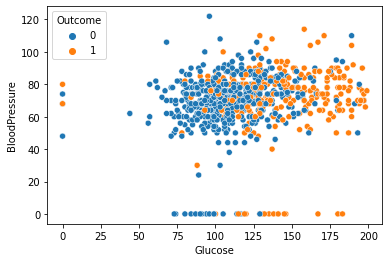

In [10]:
sns.scatterplot(x=df['Glucose'],y=df['BloodPressure'],hue=df['Outcome'])

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

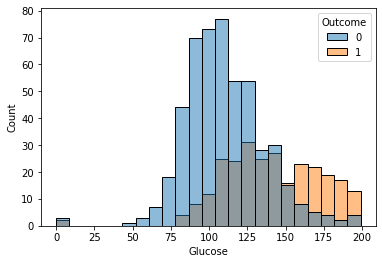

In [11]:
sns.histplot(x=df['Glucose'],hue=df['Outcome'])

<AxesSubplot:ylabel='Glucose'>

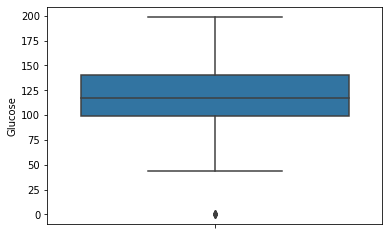

In [12]:
sns.boxplot(y=df['Glucose'],hue=df['Outcome'])

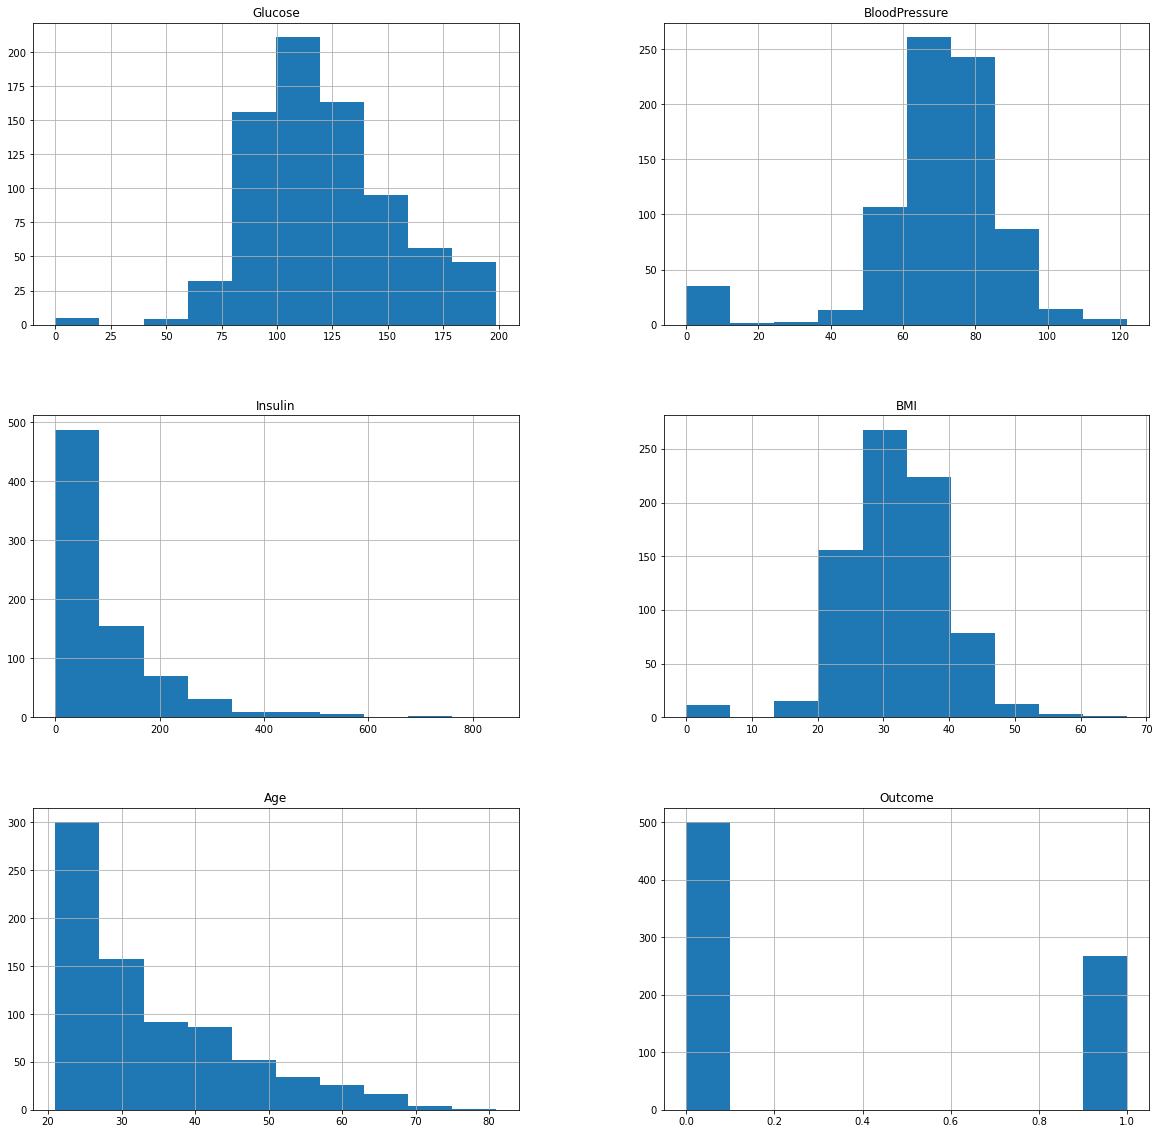

In [13]:
hist=df.hist(figsize=(20,20))

<AxesSubplot:>

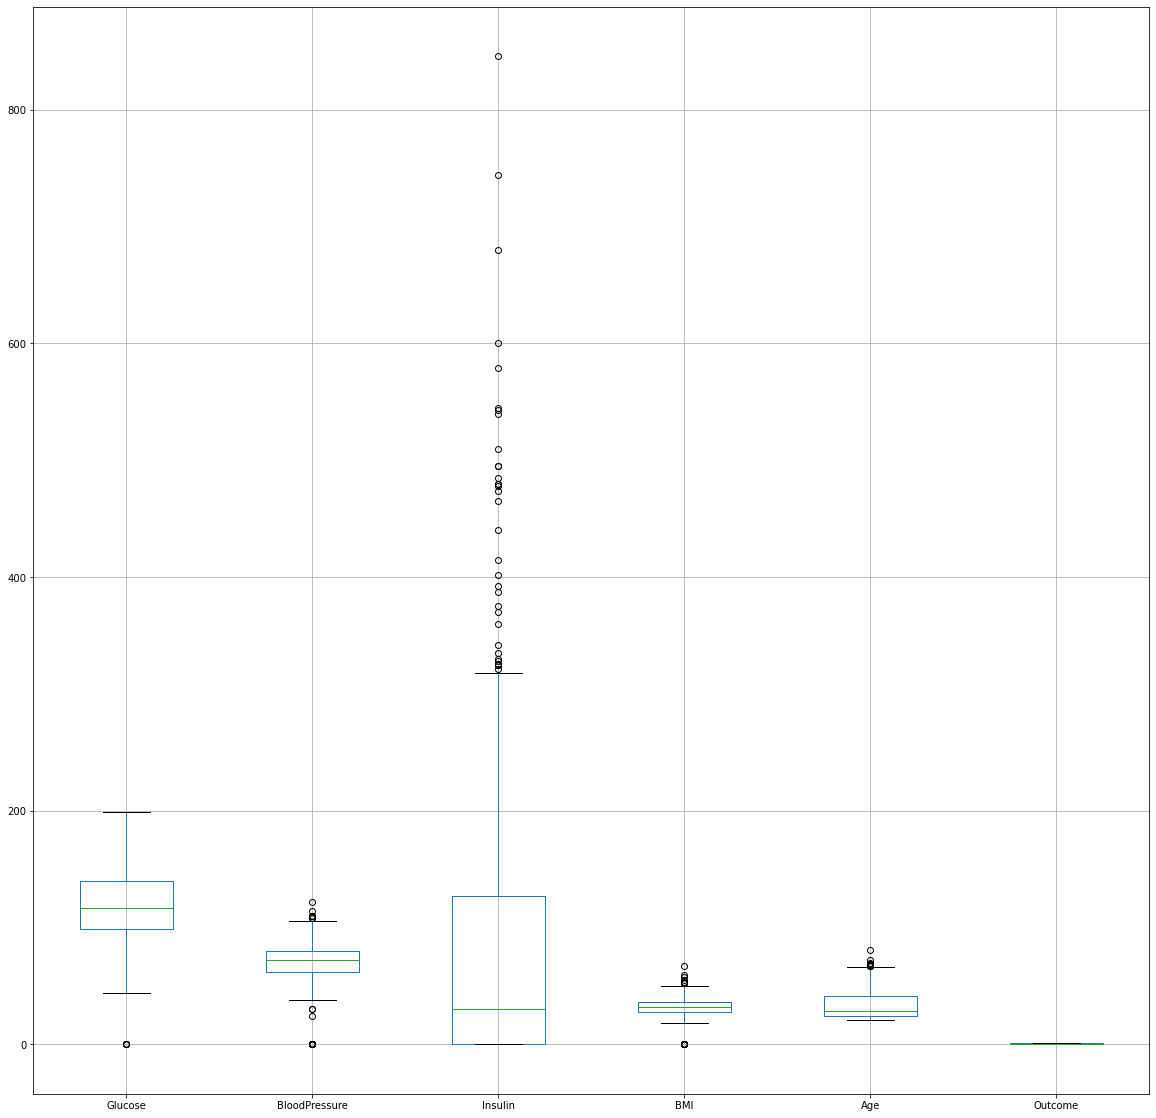

In [14]:
df.boxplot(figsize=(20,20))

In [15]:
df[df['Glucose']==0]

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
75,0,48,0,24.7,22,0
182,0,74,23,27.7,21,0
342,0,68,0,32.0,22,0
349,0,80,0,41.0,37,1
502,0,68,0,39.0,41,1


In [16]:
df[df['Insulin']==0]

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,148,72,0,33.6,50,1
1,85,66,0,26.6,31,0
2,183,64,0,23.3,32,1
5,116,74,0,25.6,30,0
7,115,0,0,35.3,29,0
...,...,...,...,...,...,...
761,170,74,0,44.0,43,1
762,89,62,0,22.5,33,0
764,122,70,0,36.8,27,0
766,126,60,0,30.1,47,1


In [17]:
count=0
for i in df.index:
    if df.loc[i,'Insulin']==0:
        df.loc[i,'Insulin']=df['Insulin'].mean()
        count=count+1

In [18]:
count

374

In [19]:
df[df['Insulin']==0]

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome


In [20]:
count=0
for i in df.index:
    if df.loc[i,'Glucose']==0:
        df.loc[i,'Glucose']=df['Glucose'].mean()
        count=count+1

In [21]:
count

5

In [22]:
df[df['BloodPressure']==0]

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
7,115.0,0,80.215914,35.3,29,0
15,100.0,0,80.739515,30.0,32,1
49,105.0,0,82.868319,0.0,24,0
60,84.0,0,83.192445,0.0,21,0
78,131.0,0,84.501677,43.2,26,1
81,74.0,0,84.832191,0.0,22,0
172,87.0,0,89.597464,28.9,25,0
193,135.0,0,90.770957,52.3,40,1
222,119.0,0,92.560078,25.2,37,0
261,141.0,0,95.000547,30.0,27,1


In [23]:
count=0
for i in df.index:
    if df.loc[i,'BloodPressure']==0:
        df.loc[i,'BloodPressure']=df['BloodPressure'].mean()
        count=count+1

In [24]:
count

35

In [25]:
df[df['BMI']==0]

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
9,125.0,96.000000,80.320362,0.0,54,1
49,105.0,69.285548,82.868319,0.0,24,0
60,84.0,69.375764,83.192445,0.0,21,0
81,74.0,69.556547,84.832191,0.0,22,0
145,102.0,75.000000,87.980017,0.0,21,0
371,118.0,64.000000,89.000000,0.0,21,0
426,94.0,70.651185,104.331327,0.0,25,0
494,80.0,71.204948,108.908978,0.0,22,0
522,114.0,71.297662,110.766961,0.0,26,0
684,136.0,82.000000,122.599749,0.0,69,0


In [26]:
count=0
for i in df.index:
    if df.loc[i,'BMI']==0:
        df.loc[i,'BMI']=df['BMI'].mean()
        count=count+1

In [27]:
count

11

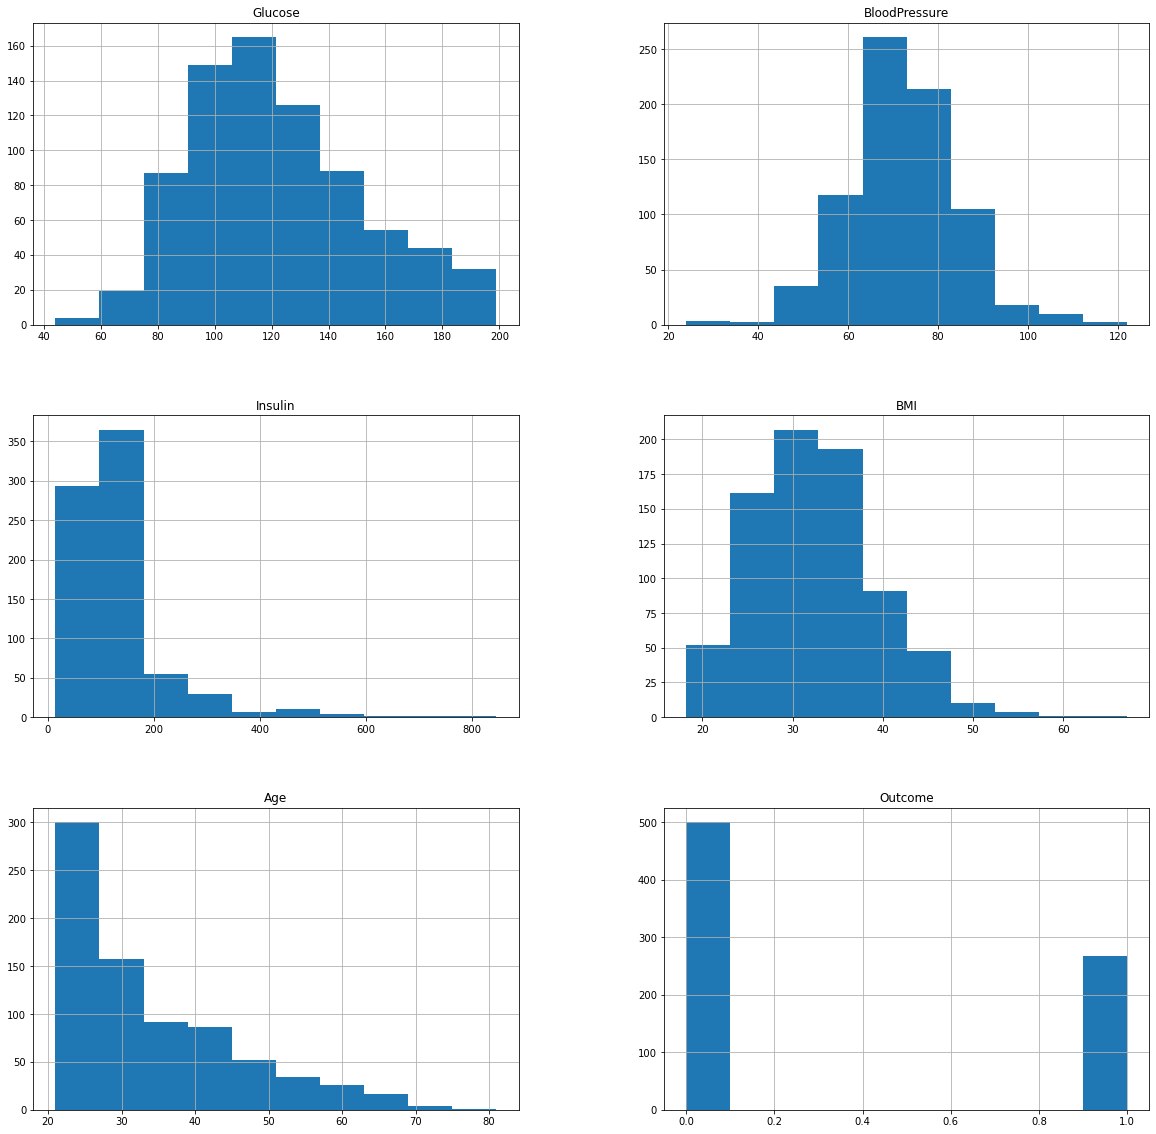

In [28]:
data=df.hist(figsize=(20,20))

<AxesSubplot:>

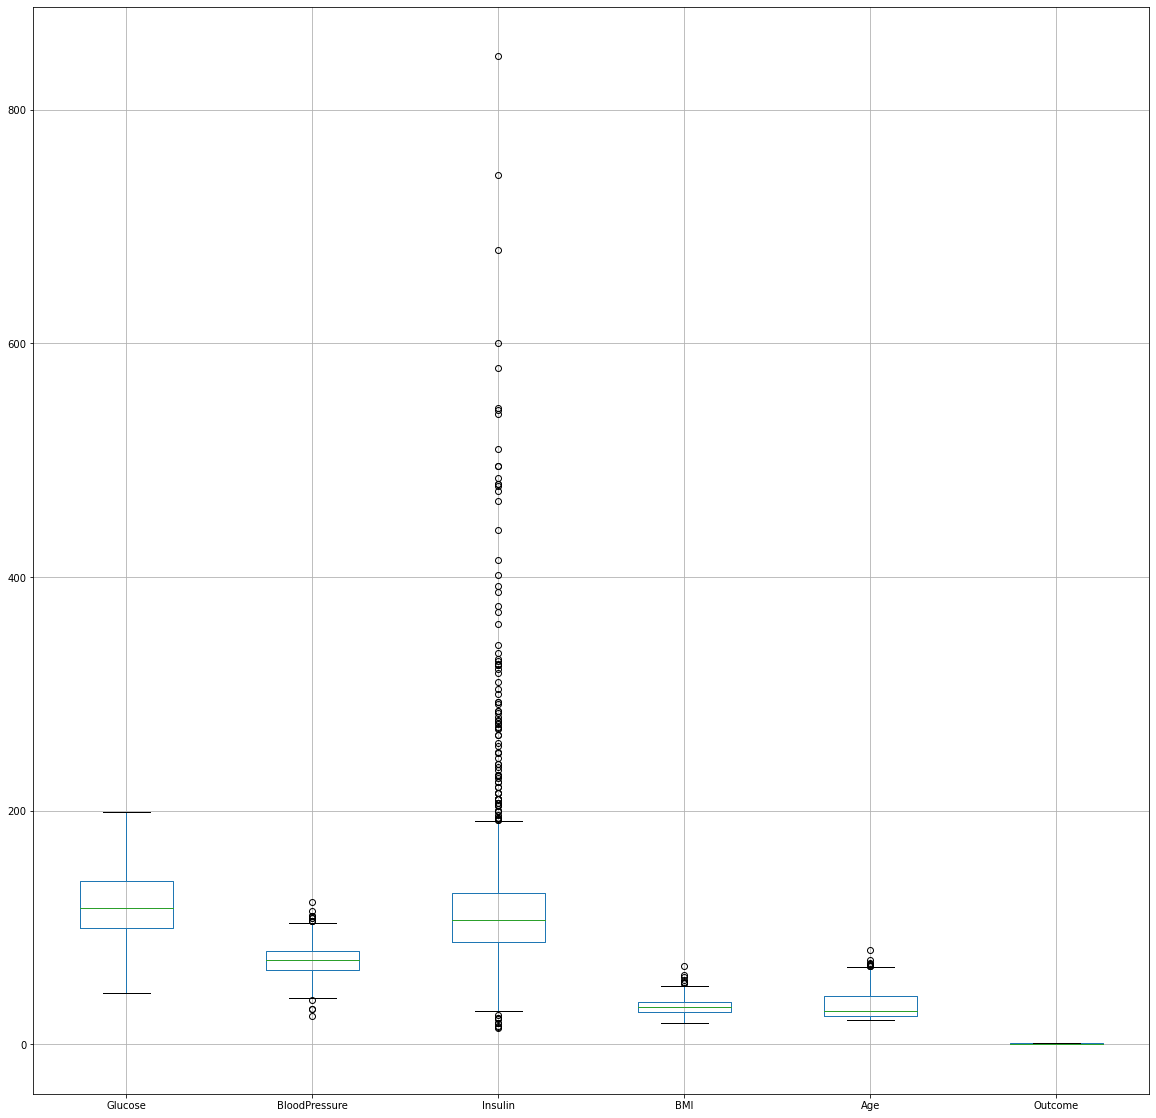

In [29]:
df.boxplot(figsize=(20,20))

In [30]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [31]:
df = treat_outliers_all(df , df.iloc[: , 0::])

<AxesSubplot:>

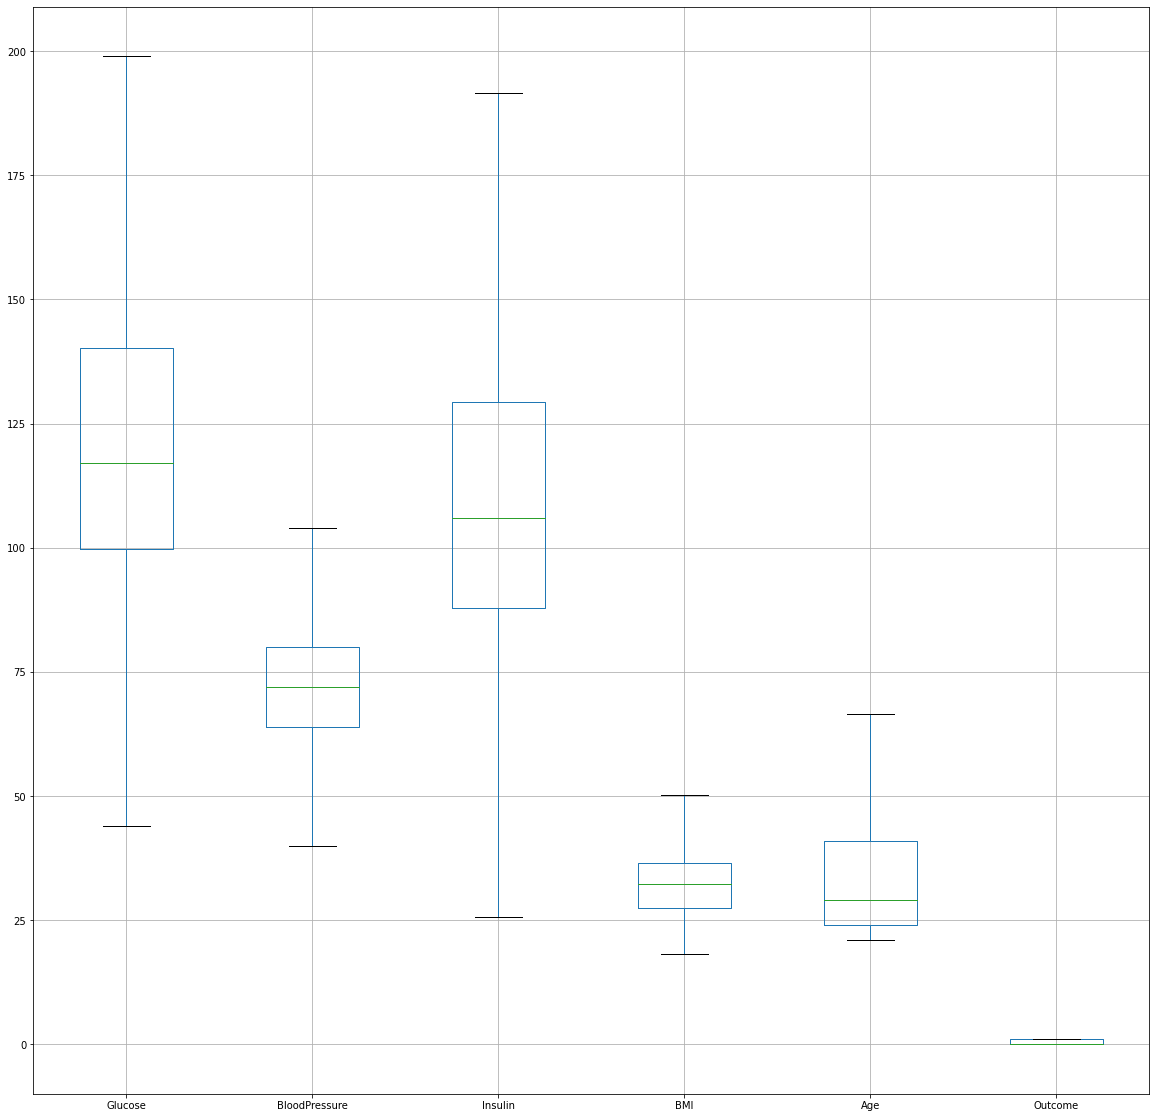

In [32]:
df.boxplot(figsize=(20,20))

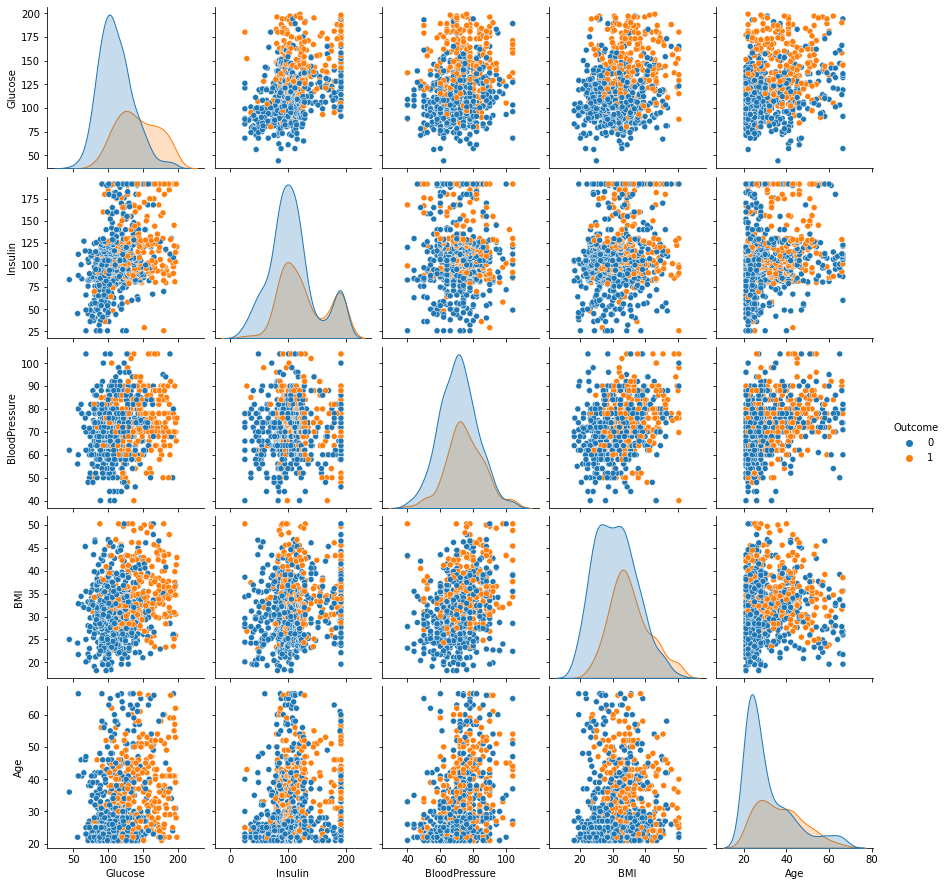

In [33]:
sns.pairplot(df[['Glucose','Insulin','BloodPressure','BMI','Age','Outcome']],hue='Outcome')

In [34]:
df.columns

Index(['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age', 'Outcome'], dtype='object')

In [35]:
x=df.loc[:,['Glucose','Insulin','BMI']]

In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  768 non-null    float64
 1   Insulin  768 non-null    float64
 2   BMI      768 non-null    float64
dtypes: float64(3)
memory usage: 18.1 KB


In [37]:
y=df.iloc[:,-1:]

In [38]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Outcome  768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [40]:
print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train (614, 3)
y_train (614, 1)
x_test (154, 3)
y_test (154, 1)


In [41]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [42]:
classifier.fit(x_train,y_train)

<ipython-input-42-b827a6aea6de>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(x_train,y_train)


KNeighborsClassifier()

In [43]:
y_pred=classifier.predict(x_test)

In [44]:
accuracy_score(y_pred,y_test)

0.6883116883116883

In [45]:
cm=confusion_matrix(y_pred,y_test)

In [46]:
cm

array([[76, 27],
       [21, 30]], dtype=int64)

In [47]:
print("Precision:",precision_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))
print("f11_score:",f1_score(y_test,y_pred))

Precision: 0.5882352941176471
recall: 0.5263157894736842
f11_score: 0.5555555555555555


In [48]:
def print_confusion_matrix(y_true, y_pred):
    sns.heatmap(confusion_matrix(y_true=y_true, y_pred=y_pred), annot=True, cmap='coolwarm', cbar=False)
    plt.title('Confusion matrix')
    plt.xlabel('Predict')
    plt.ylabel('Actual')
    plt.show()

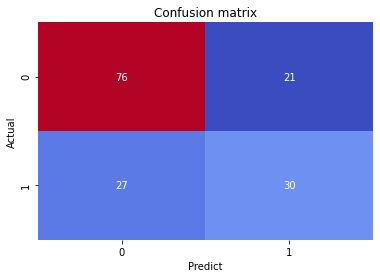

In [49]:
print_confusion_matrix(y_test,y_pred)